In [2]:
#importint the necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("advertising.csv.xls")

In [9]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
df.shape

(200, 4)

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


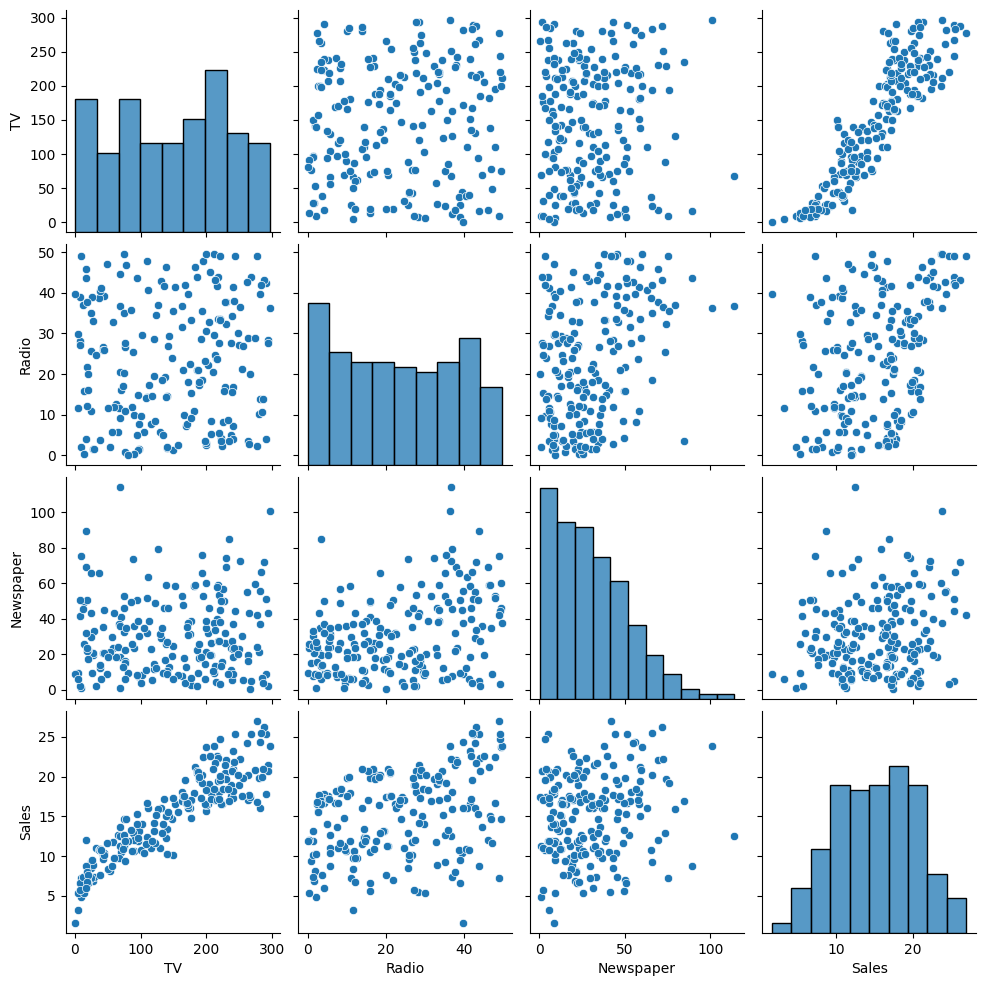

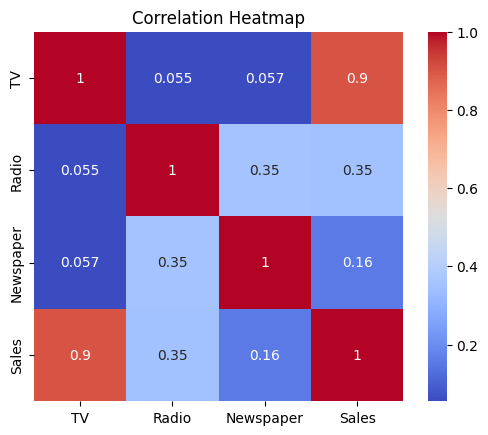

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Standardize features using StandardScaler (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1.841708573085811
R-squared Score: 0.9227214073019624


In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split into features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter (L2 penalty)
    'eta0': [0.01, 0.05, 0.1]              # Initial learning rate
}

# Initialize SGDRegressor for grid search
sgd_regressor = SGDRegressor(max_iter=1000, learning_rate='constant', random_state=42)

# Initialize GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search to find the best model
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters found by GridSearchCV
print("Best Parameters:")
print(best_params)

# Make predictions using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Best Parameters:
{'alpha': 0.0001, 'eta0': 0.01}
Mean Squared Error: 1.8428385913826602
R-squared Score: 0.9226739914268454


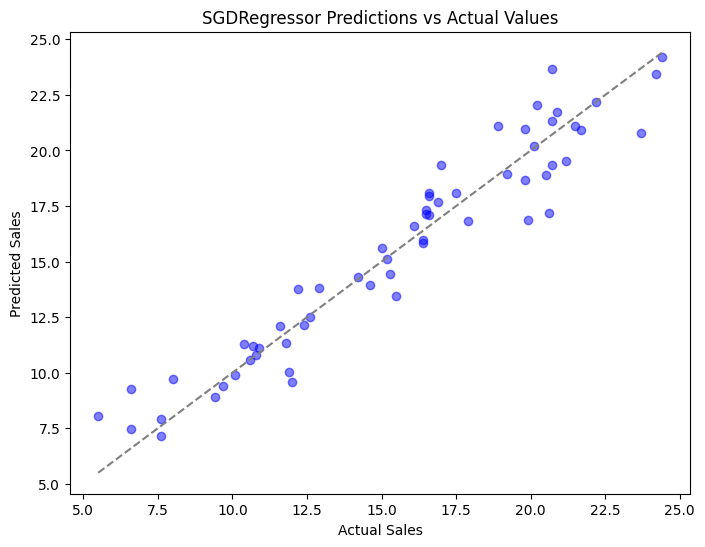

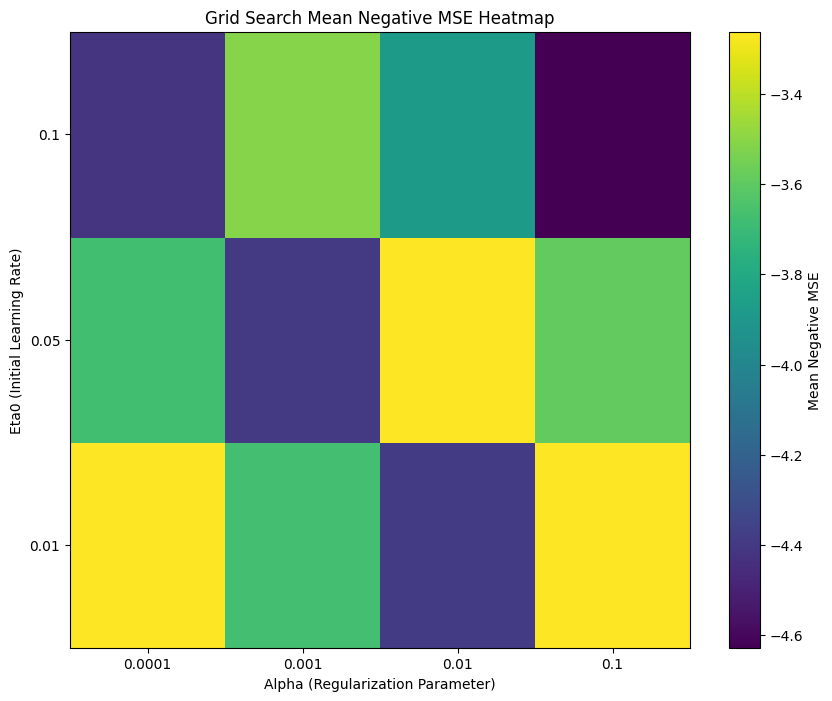

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('SGDRegressor Predictions vs Actual Values')
plt.show()

# Visualize the effect of hyperparameters during GridSearchCV
alpha_values = [0.0001, 0.001, 0.01, 0.1]
eta0_values = [0.01, 0.05, 0.1]

# Create meshgrid for plotting
X, Y = np.meshgrid(alpha_values, eta0_values)
Z = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(eta0_values), len(alpha_values))

# Plot heatmap of mean test scores
plt.figure(figsize=(10, 8))
plt.imshow(Z, interpolation='nearest', cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Mean Negative MSE')
plt.xticks(np.arange(len(alpha_values)), alpha_values)
plt.yticks(np.arange(len(eta0_values)), eta0_values)
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Eta0 (Initial Learning Rate)')
plt.title('Grid Search Mean Negative MSE Heatmap')
plt.show()
